Wir werden uns in dieser Aufgabe mit einem wichtigen Datensatz auseinandersetzen : mit den monatliche Lufttemperaturmessungen auf der Erdoberfläche in der
nördlichen Hemisphäre 1.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

global_temp = pd.read_csv("global_temp.csv")
global_temp["Zeit"] = pd.DatetimeIndex(global_temp["Zeit"])
global_temp.set_index("Zeit", inplace=True)

global_temp.head()

,anomalies
Zeit,
1850-01-01,-3.105
1850-02-01,0.632
1850-03-01,-1.336
1850-04-01,-1.436
1850-05-01,-1.052


---
b) Führen Sie Zerlegung der Zeitreihe mit Hilfe von seasonal_decomposedurch.
Stellen Sie den Parameter freq optimal ein, indem Sie unterschiedliche Werte
graphisch prüfen. Was beobachten Sie?

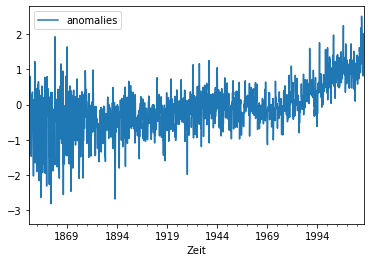

In [4]:
global_temp.plot()

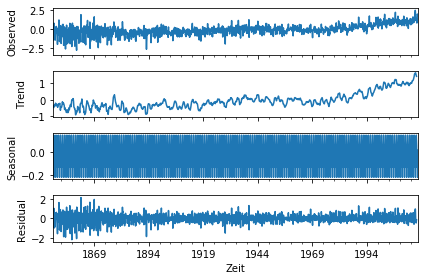

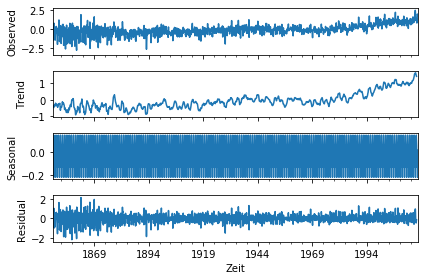

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(global_temp, freq=12)

decompose.plot() # all 12 months is a period (year)

---
c) Wird die Restreihe durch einen schwach stationären Prozess generiert? Berechnen Sie das entsprechende Korrelogramm. Gibt es statistisch signifikante Korrelationen?

Nein, der Restterm ist ein stationaerer prozess, es ist einfach weisses rauschen.

In [67]:
residual, trend  = decompose.resid.dropna(), decompose.trend.dropna()

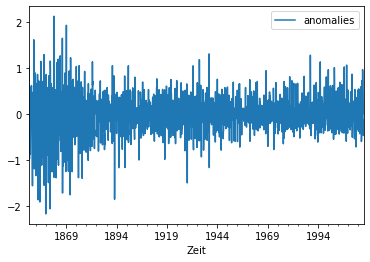

In [66]:
residual.plot()

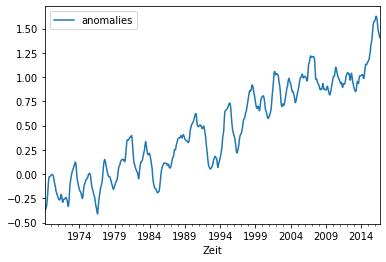

In [68]:
trend.loc[(trend.index > '1969-01-01') & (trend.index < '2017-01-01')].plot()

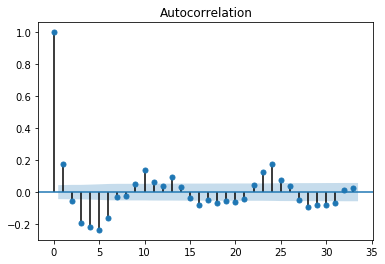

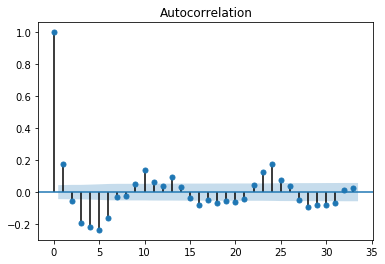

In [72]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residual)

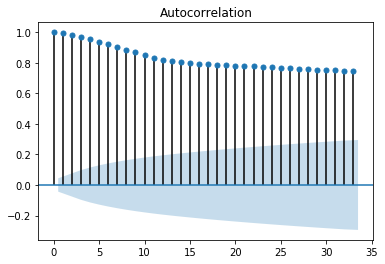

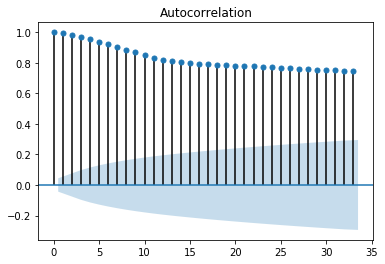

In [70]:
plot_acf(trend)